In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

Os dados que serão analisados foram coletados em uma pesquisa realizada em 1980, cujo propósito era examinar os efeitos de condições sociais na saúde mental e física e explicar os efeitos dos padrões sociais de bem-estar.



In [2]:
#data, _ = pyreadstat.read_dta("../../data/earnings/heights.dta")
data = pd.read_csv("../../data/earnings.csv")

In [3]:
data.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


In [5]:
data = data.dropna(subset=["education"])

In [6]:
data.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1814.000000,1787.000000,1814.000000,1814.000000,1814.000000,1814.000000,1571.000000,1520.000000,1814.000000,1814.000000,1813.000000,1813.000000,1813.000000,1814.000000
mean,66.566152,156.232233,0.371555,21140.292172,21.140292,13.235391,13.554424,13.596053,5.304300,3.051268,1.745174,1.423056,1.423056,42.912900
std,3.831789,34.536919,0.483353,22541.824767,22.541825,2.556638,2.392411,2.403363,2.599803,2.316662,0.435884,2.158524,2.158524,17.155919
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.000000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,55.750000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,18.000000,18.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


## Distribuição dos dados

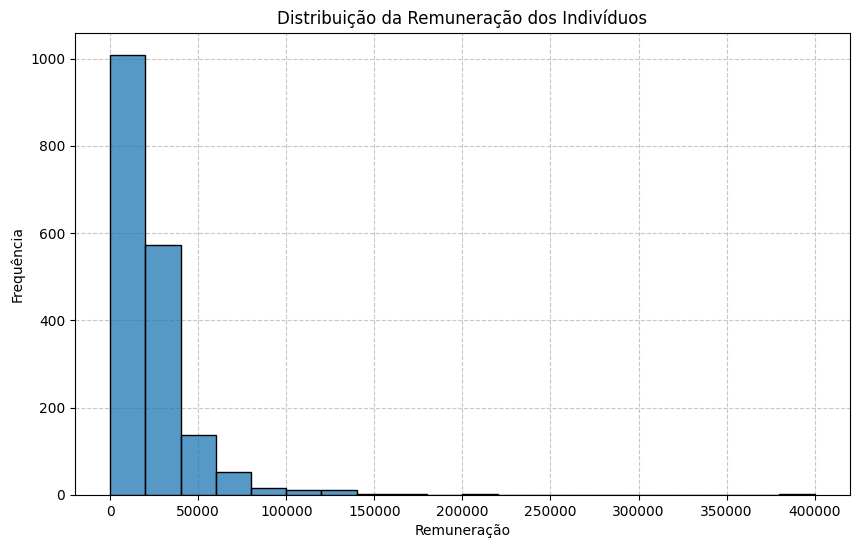

In [7]:
fig = plt.figure(figsize=(10, 6))

sns.histplot(data["earn"], bins=20, zorder=5)
plt.grid(linestyle="--", alpha=0.7, zorder=0)
plt.xlabel("Remuneração")
plt.ylabel("Frequência")
plt.title("Distribuição da Remuneração dos Indivíduos")

plt.savefig("../../images/eda/earnings_distribution.png")

plt.show()

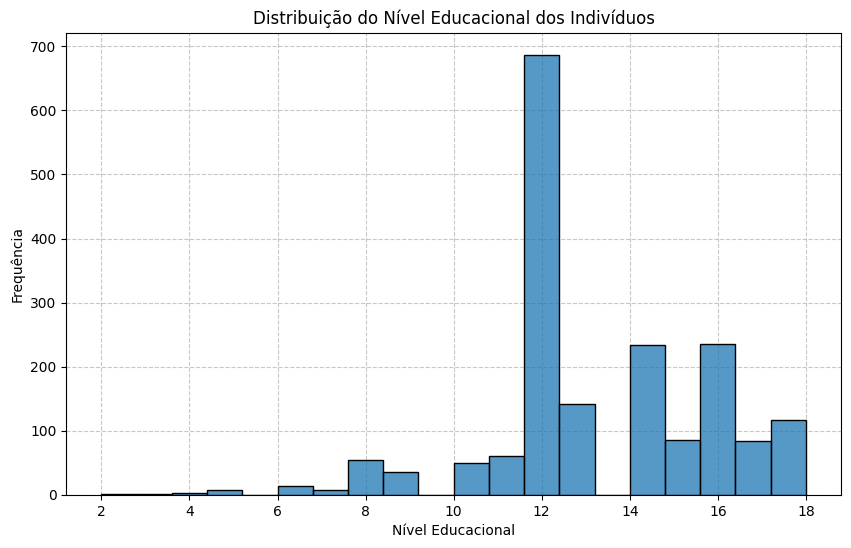

In [8]:
fig = plt.figure(figsize=(10, 6))

sns.histplot(data["education"], bins=20, zorder=5)
plt.grid(linestyle="--", alpha=0.7, zorder=0)
plt.xlabel("Nível Educacional")
plt.ylabel("Frequência")
plt.title("Distribuição do Nível Educacional dos Indivíduos")

plt.savefig("../../images/eda/education_distribution.png")

plt.show()

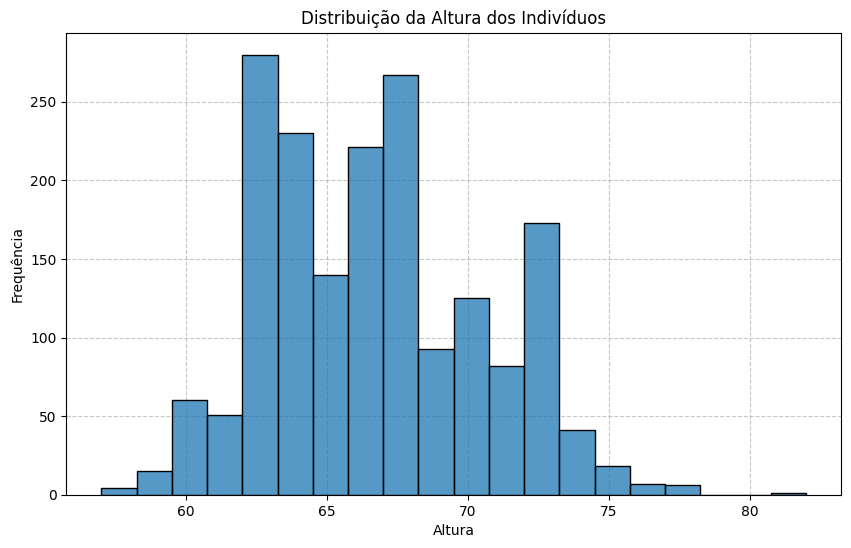

In [9]:
fig = plt.figure(figsize=(10, 6))

sns.histplot(data["height"], bins=20, zorder=5)
plt.grid(linestyle="--", alpha=0.7, zorder=0)
plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Distribuição da Altura dos Indivíduos")

plt.savefig("../../images/eda/height_distribution.png")

plt.show()

## Relação entre covariáveis e a variável resposta

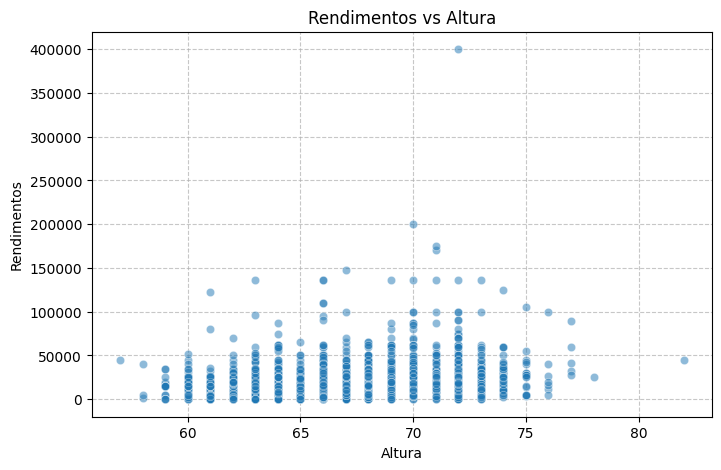

In [10]:
fig = plt.figure(figsize=(8, 5))

sns.scatterplot(x="height", y="earn", data=data, alpha=0.5, zorder=2)
plt.title("Rendimentos vs Altura")
plt.xlabel("Altura")
plt.ylabel("Rendimentos")
plt.grid(linestyle="--", alpha=0.7, zorder=0)

plt.savefig("../../images/eda/earnings_vs_height.png")

plt.show()

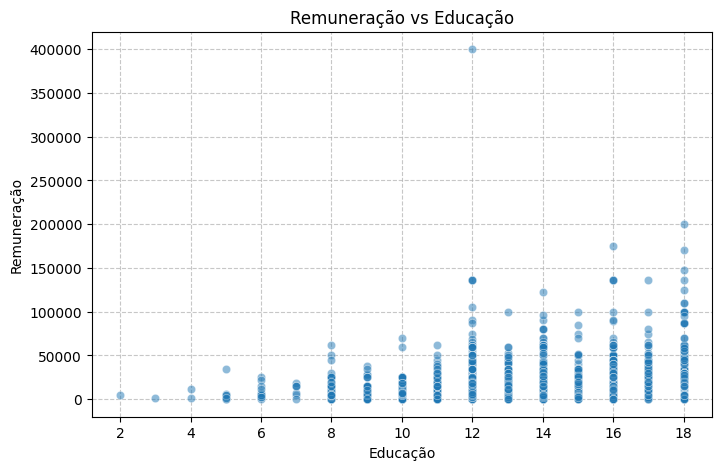

In [11]:
fig = plt.figure(figsize=(8, 5))

sns.scatterplot(x="education", y="earn", data=data, alpha=0.5, zorder=2)
plt.title("Remuneração vs Educação")
plt.xlabel("Educação")
plt.ylabel("Remuneração")
plt.grid(linestyle="--", alpha=0.7, zorder=0)

plt.savefig("../../images/eda/earnings_vs_education.png")

plt.show()

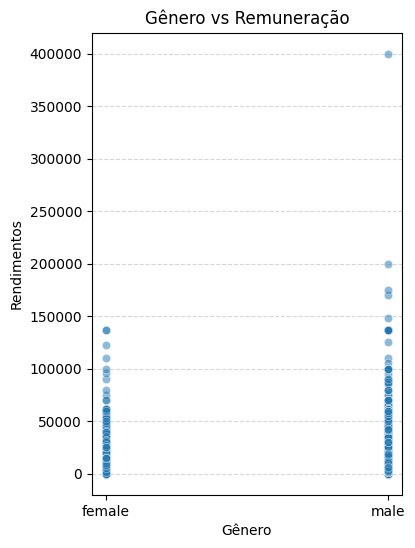

In [12]:
fig = plt.figure(figsize=(4, 6))

sns.scatterplot(x=data["male"], y=data["earn"], alpha=0.5, zorder=2)
plt.title("Gênero vs Remuneração")
plt.xlabel("Gênero")
plt.ylabel("Rendimentos")
plt.grid(linestyle="--", alpha=0.5, zorder=0, axis="y")

# Definindo rótulos personalizados para o eixo x
plt.xticks([0, 1], ["female", "male"])

plt.savefig("../../images/eda/male_vs_earnings.png")

plt.show()

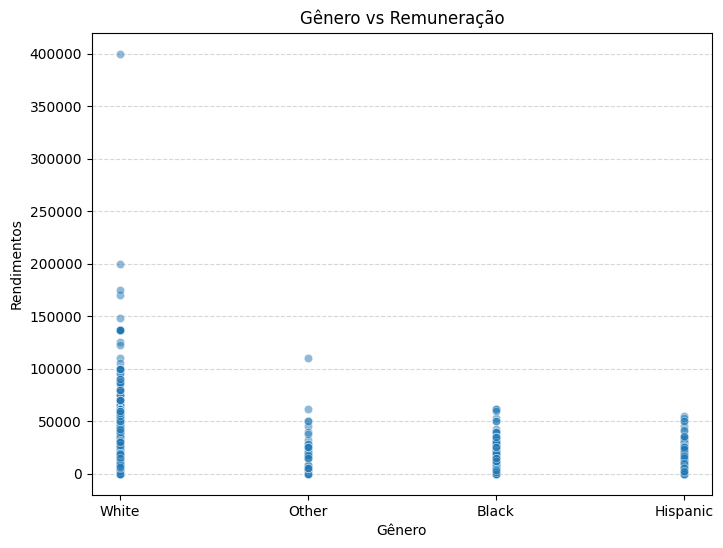

In [13]:
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(x=data["ethnicity"], y=data["earn"], alpha=0.5, zorder=2)
plt.title("Gênero vs Remuneração")
plt.xlabel("Gênero")
plt.ylabel("Rendimentos")
plt.grid(linestyle="--", alpha=0.5, zorder=0, axis="y")

# Definindo rótulos personalizados para o eixo x
plt.xticks(["White", "Black", "Hispanic", "Other"])

plt.savefig("../../images/eda/ethnicity_vs_earnings.png")

plt.show()

## Correlação entre as covariáveis

In [14]:
# Criando um dicionário para mapear os valores de etnia
mapa_etnia = {
    "White": 1,
    "Black": 2,
    "Hispanic": 3,
    "Other": 40
}

# Usando .loc para garantir que a modificação é feita no DataFrame original
data.loc[:, "ethnicity"] = data["ethnicity"].map(mapa_etnia)

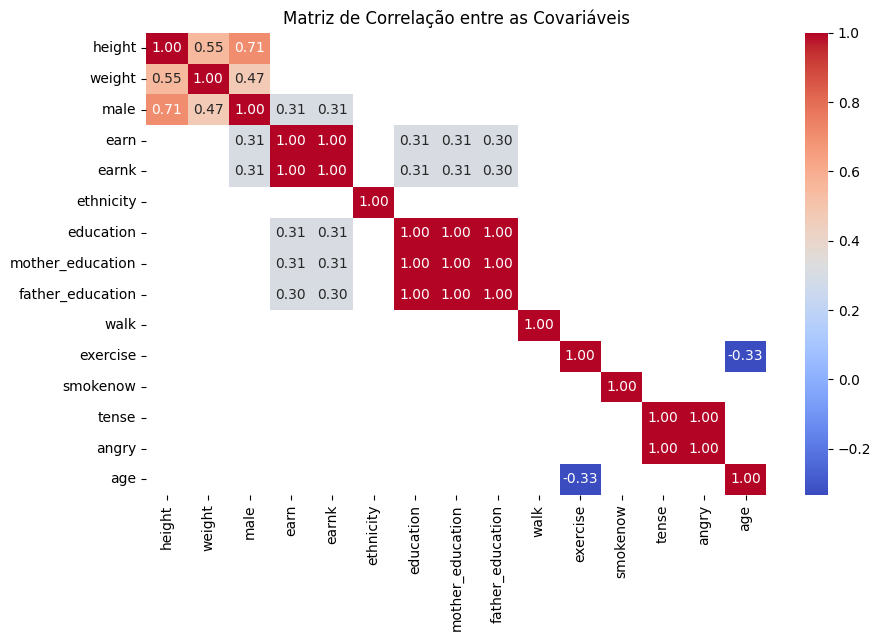

In [15]:
fig = plt.figure(figsize=(10, 6))

sns.heatmap(data.corr()[(data.corr() > 0.3) | (data.corr() < -0.3)], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre as Covariáveis")

plt.savefig("../../images/eda/correlation_matrix.png")

plt.show()
